In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
dataframe = pd.read_csv('online_shoppers_intention.csv')

In [16]:
dataframe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


__"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"__ represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

__The "Bounce Rate", "Exit Rate" and "Page Value"__ represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

__The "Special Day"__ indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes __operating system, browser, region, traffic type, visitor type__ as returning or new visitor, a Boolean value indicating whether the date of the visit is __weekend__, and __month__ of the year.



In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [18]:
dataframe.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [19]:
dataframe.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Procent zakupów

In [20]:
dataframe.Revenue.mean()

0.15474452554744525

#### Rozkład Administrative

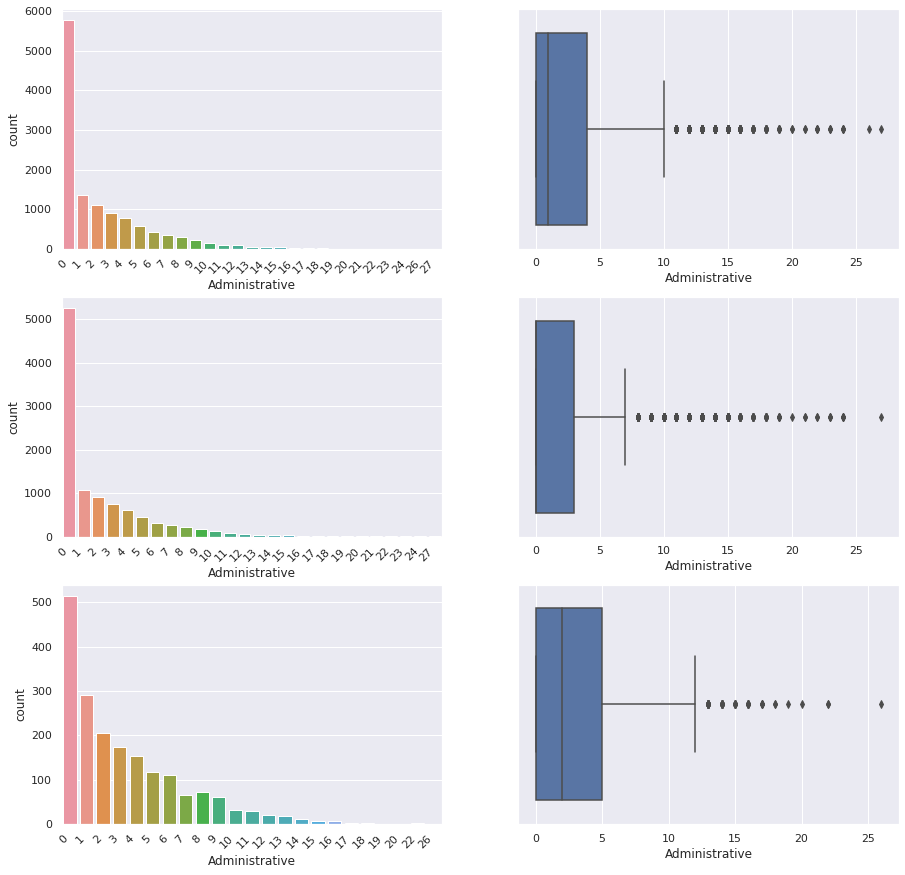

In [21]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
ax1 = sns.countplot(x='Administrative', data=dataframe)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=dataframe['Administrative'])

plt.subplot(3, 2, 3)
ax1 = sns.countplot(x='Administrative', data=dataframe[dataframe['Revenue'] == False])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 4)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == False]['Administrative'])

plt.subplot(3, 2, 5)
ax1 = sns.countplot(x='Administrative', data=dataframe[dataframe['Revenue'] == True])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 6)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == True]['Administrative'])

plt.show()

#### Rozkład Administrative Duration

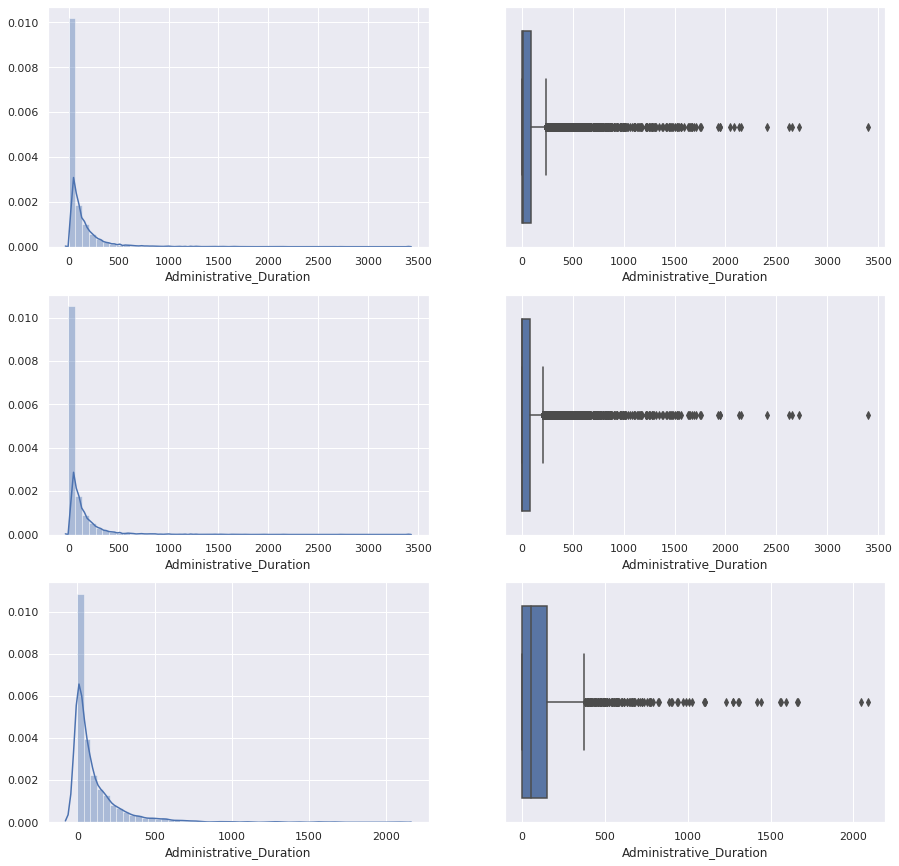

In [22]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
ax1 = sns.distplot(dataframe.Administrative_Duration)

plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=dataframe['Administrative_Duration'])

plt.subplot(3, 2, 3)
data=dataframe[dataframe['Revenue'] == False]
ax1 = sns.distplot(data.Administrative_Duration)

plt.subplot(3, 2, 4)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == False]['Administrative_Duration'])

plt.subplot(3, 2, 5)
data=dataframe[dataframe['Revenue'] == True]
ax1 = sns.distplot(data.Administrative_Duration)

plt.subplot(3, 2, 6)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == True]['Administrative_Duration'])

plt.show()

#### Rozkład Informational

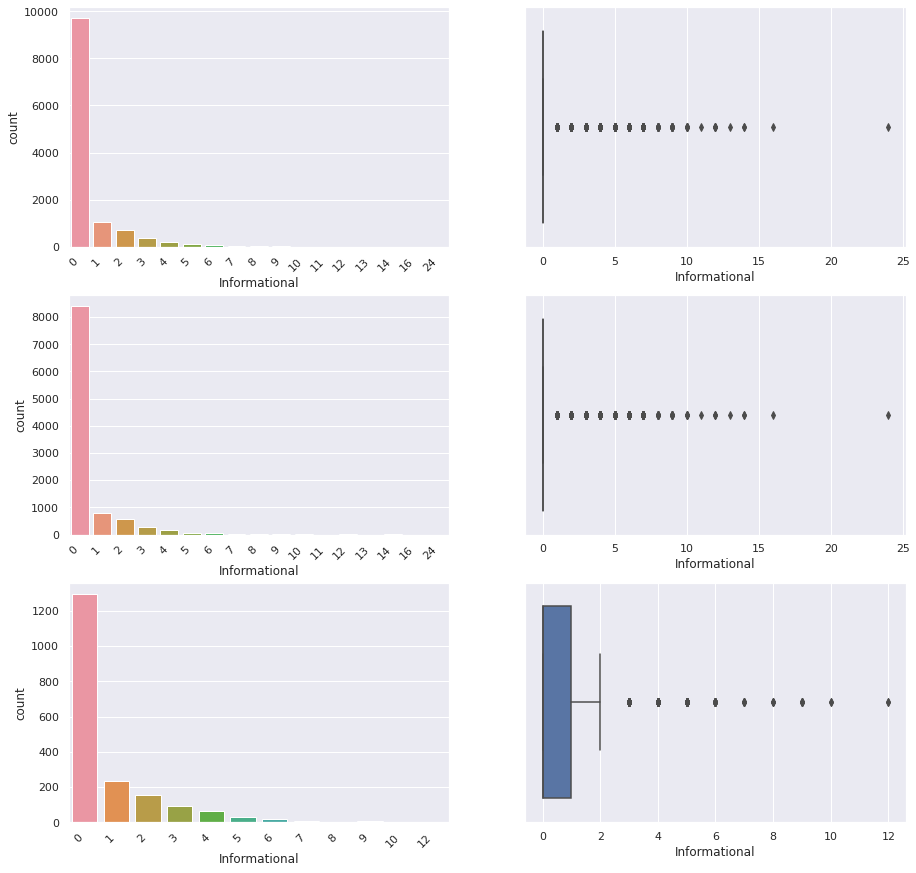

In [23]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
ax1 = sns.countplot(x='Informational', data=dataframe)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=dataframe['Informational'])

plt.subplot(3, 2, 3)
ax1 = sns.countplot(x='Informational', data=dataframe[dataframe['Revenue'] == False])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 4)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == False]['Informational'])

plt.subplot(3, 2, 5)
ax1 = sns.countplot(x='Informational', data=dataframe[dataframe['Revenue'] == True])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(3, 2, 6)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == True]['Informational'])

plt.show()

#### Rozkład Product Related

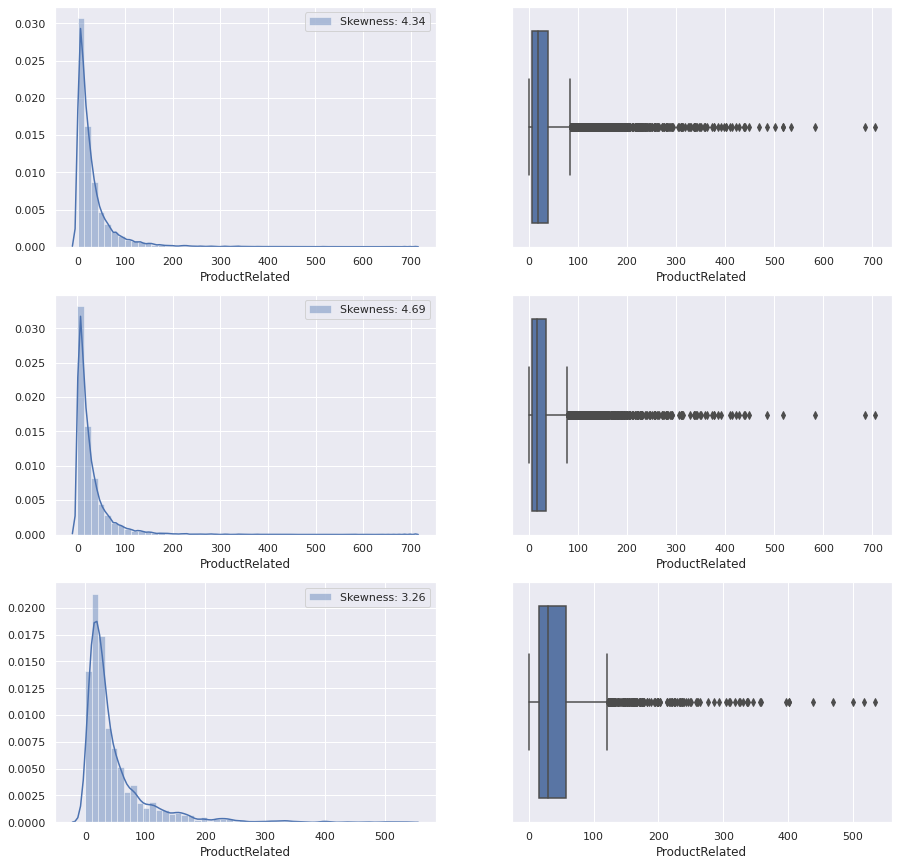

In [24]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
sns.distplot(dataframe.ProductRelated, label='Skewness: %.2f' % (dataframe.ProductRelated.skew()))
plt.legend()

plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=dataframe['ProductRelated'])

plt.subplot(3, 2, 3)
sns.distplot(dataframe[dataframe['Revenue'] == False]['ProductRelated'], label='Skewness: %.2f' % (dataframe[dataframe['Revenue'] == False]['ProductRelated'].skew()))
plt.legend()

plt.subplot(3, 2, 4)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == False]['ProductRelated'])

plt.subplot(3, 2, 5)
sns.distplot(dataframe[dataframe['Revenue'] == True]['ProductRelated'], label='Skewness: %.2f' % (dataframe[dataframe['Revenue'] == True]['ProductRelated'].skew()))
plt.legend()

plt.subplot(3, 2, 6)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == True]['ProductRelated'])

plt.show()

#### Rozkład Product Related Duration

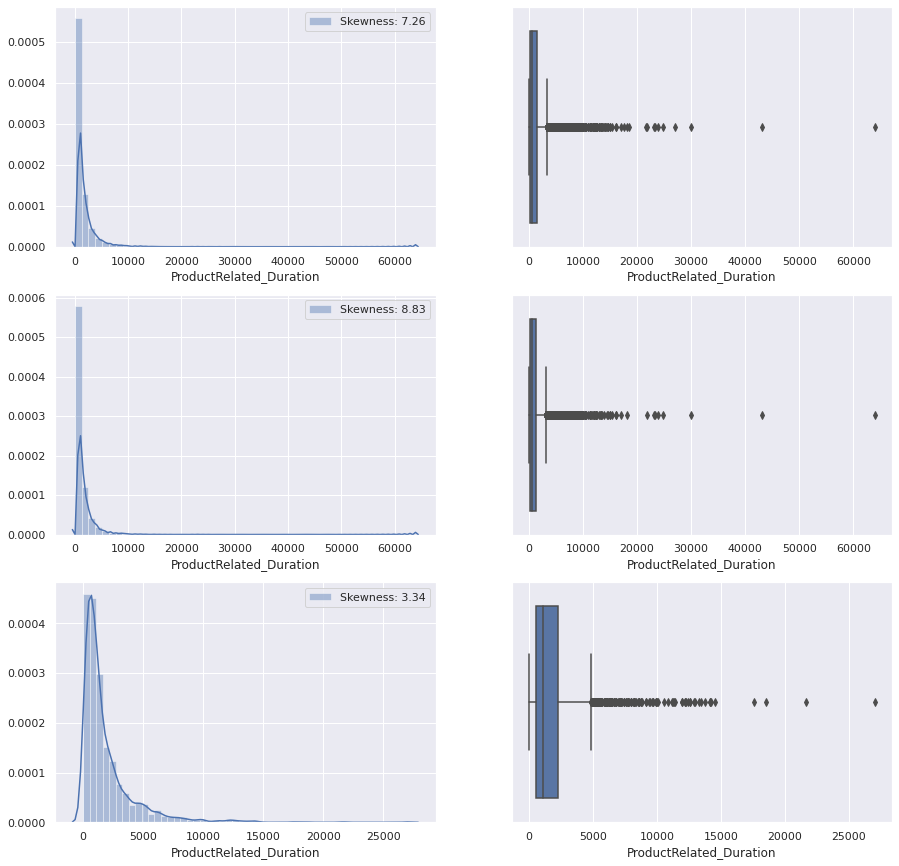

In [25]:
sns.set(style="darkgrid")

plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
sns.distplot(dataframe.ProductRelated_Duration, label='Skewness: %.2f' % (dataframe.ProductRelated_Duration.skew()))
plt.legend()

plt.subplot(3, 2, 2)
ax2 = sns.boxplot(x=dataframe['ProductRelated_Duration'])

plt.subplot(3, 2, 3)
sns.distplot(dataframe[dataframe['Revenue'] == False]['ProductRelated_Duration'], label='Skewness: %.2f' % (dataframe[dataframe['Revenue'] == False]['ProductRelated_Duration'].skew()))
plt.legend()

plt.subplot(3, 2, 4)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == False]['ProductRelated_Duration'])

plt.subplot(3, 2, 5)
sns.distplot(dataframe[dataframe['Revenue'] == True]['ProductRelated_Duration'], label='Skewness: %.2f' % (dataframe[dataframe['Revenue'] == True]['ProductRelated_Duration'].skew()))
plt.legend()

plt.subplot(3, 2, 6)
ax2 = sns.boxplot(x=dataframe[dataframe['Revenue'] == True]['ProductRelated_Duration'])

plt.show()

#### Rozkład Bounce, Exit, Page Rate

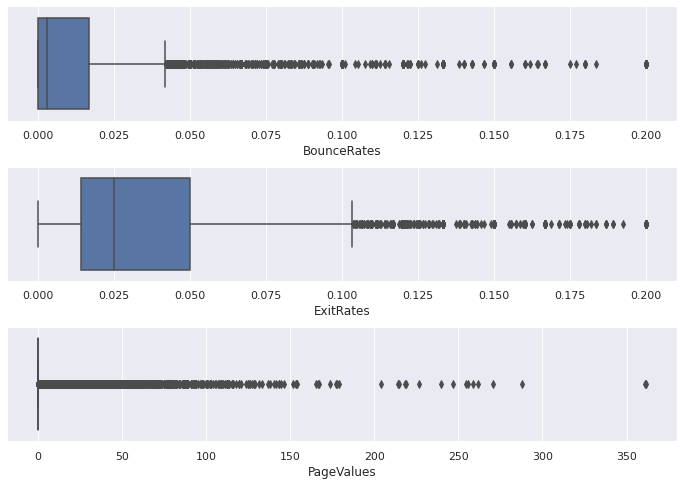

In [26]:
rates = ['BounceRates', 'ExitRates', 'PageValues']

sns.set(style="darkgrid")

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i),
    ax = sns.boxplot(x=dataframe[rates[i-1]])

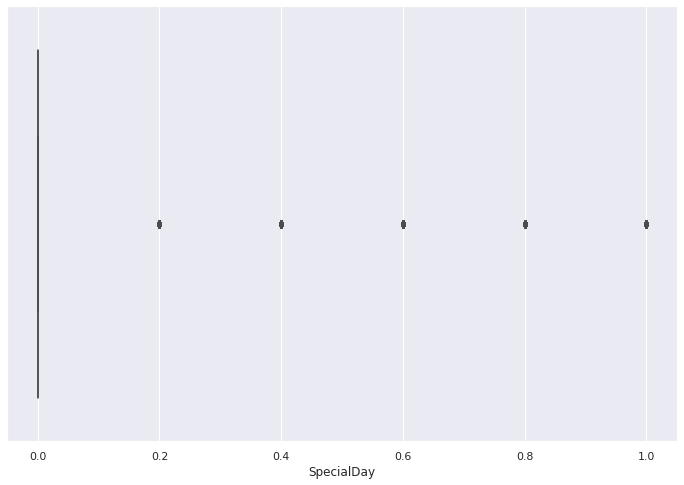

In [27]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x=dataframe['SpecialDay'])

#### Rozkład systemów operacyjnych i przeglądarek

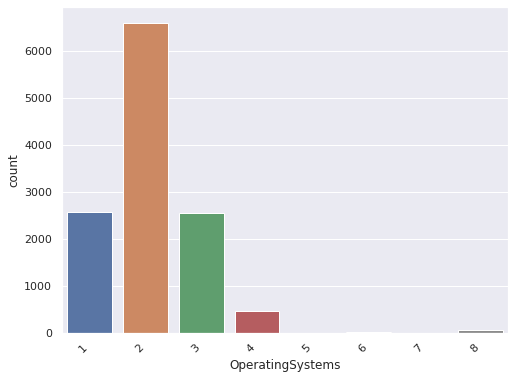

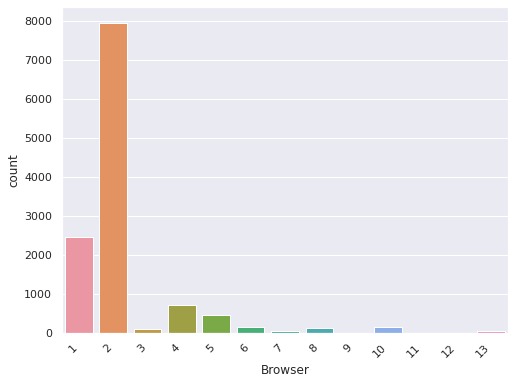

In [28]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='OperatingSystems', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

sns.set(style="darkgrid")

fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='Browser', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Mapa ciepła korelacji 

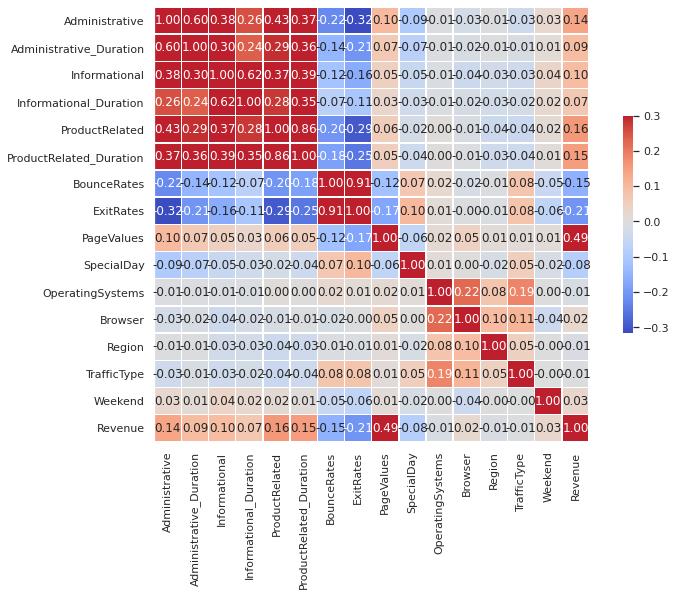

In [29]:
corr = dataframe.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(12,8)
    
plt.show()